
### Source 
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/my-blog-post-01) is a link to the source code for this perceptron blog post.

### Reference
[Here](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-perceptron.html) is a link to the main reference we are using when writing up this blog post.

### Introduction.
In this blog post, we implement the perceptron algorithm, which is oftentimes the first machine learning algorithm a student encounters in a machine learning class (which is at least true in my case). We write code in Python for this implementation, and our goal is to classify binary labeled artificial data. 

The perceptron algorithm is used to find a separating plane for two distinct "groups" of data. More specifically, the perceptron gives a hyperplane that approximately divides the data into two classes, so it works for binary classification, i.e., $y_i \in \{-1,1\}$, and when the data points are linearly separable. 


In [1]:
%load_ext autoreload
%autoreload 2

### Implementation 
First, let's import some libraries that we need.

In [41]:
import numpy as np
np.random.seed(6)
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In the following code cell, we will generate a linearly separable dataset of binary-labeled 2D points. The `make_blobs` function essentially takes $n$ samples, a number of features, and classes, and spits out a dataset of points with a data set with the given size, and label the data points using the classes. Visually, we see two clusters of points of two different color. In this special case where I set the seed, those two clusters seems linearly separable, which just means we could draw a straight line that completely seprates them. If we go to higher dimensions, then we need precise mathematical definitions, but we don't need to worry about that right now.

X has dimension: (300, 3)
y has dimension: (300,)


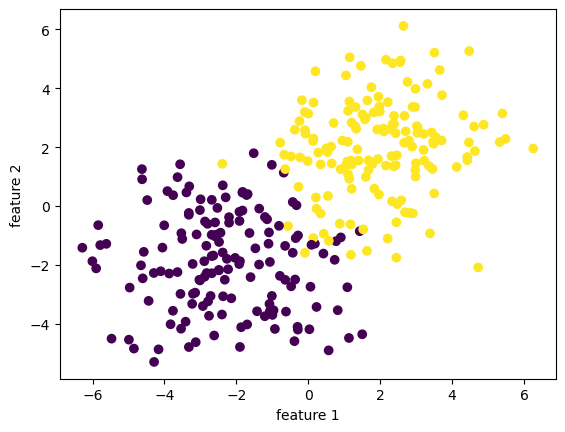

In [93]:
n=300
p_features = 3 
X, y = make_blobs(n_samples = n, n_features=p_features-1, centers=[ (-2,-2,-2), (2,2,2) ], cluster_std=1.6)
fig=plt.scatter(X[:,0], X[:,1], c=y)
xlab=plt.xlabel("feature 1")
ylab=plt.ylabel("feature 2")
print(f"X has dimension: {X.shape}")
print(f"y has dimension: {y.shape}")

To begin, we observe that our data includes a feature matrix `X`, which is a $n\times p$ matrix with entries being real numbers. The feature matrix `X` is a bunch of rows stacked together, and each row is going to represent a data point in our data set. Hence, since we have $n$ data points in our data set, we have $n$ rows in our feature matrix `X`. Since we record in each data point $p$ many features that constitutes this data point, our feature matrix `X` has $p$ columns. In other words, the number $n$ represents the number of distinct observations, corresponding to $n$ rows in `X`. $p$ will always denote the number of features in this blog post. Our data also have a `y`, which is called target vector and lives in $\mathbb{R}^n$. The target vector gives a label for each observation, so it is telling us yes or no for each data point in `X`. More specifically, $y \in \{-1,1\}^{n}$. Hence, we have `X`, which contains a lot of information, and we want to predict `y`.

Let's discuss how this is going to work. We are working on classifying points into two categories, or two labels, which involves finding a weight vector $w \in \mathbb{R}^p$, and a constant term (also known as bias) $b \in \mathbb{R}$ that defines a hyperplane:
$$ 
\{ x \in \mathbb{R}^p \vert \langle w,x \rangle - b = \sum_{i=1}^{p} w_i x_i - b = 0 \}.
$$ 
When $p=2$, our hyperplane is just a line. We want our weight vector $w$ together with constant $b$ to define a hyperplae that separates the all the data points into two classes, which means 
$$ 
\langle w, x_i \rangle - b \iff y_i = 1.
$$
So we want to obtain the weight vector $w$ and constant $b$ that can correctly predict $x_i$ is associated with which label $y_i \in \{-1,1\}$. 

Now, let 
$$ \hat{y_i} := \langle w, x_i \rangle - b. $$ 
The **classification accuracy** is given by
$$ A(\tilde{w}) = \frac{1}{n} \sum_{i=1}^{n} \mathbb{1} [ \hat{y_i} y_i > 0] . $$
On the other hand, the loss, also known as the **empirical risk** is
$$
R(\tilde{w}) = 1 - A(\tilde{w})
$$

Notation: remember $ \hat{y_i} = \langle w, x_i \rangle - b,$ and $\tilde{w} = (w,-b),$ and $\tilde{x} = (x,1)$.

We want the accuracy to be high, and we want the loss to be low.

Hence, we want to minimize the function $R$ with respect to the weights $w$ and constant $b$. Now, we are ready to implement all of this in python code using `numpy` library.

### The Perceptron Algorithm 
Our goal is to find the separating line using the perceptron algorithm. The algorithm takes in our feature matrix `X` and our vector of labels `y`. As detailed in the source code (link at the start of the blog), the algorithm performs the following steps:
* Initialize the weights vector `w`
* Iterate through the data points (randomly), updating the weights `w` until either a user-specified maximum number of iteration is reached.
* record the accuracy score in `self.history`.

State in mathematical terms, we would like to apply the perceptron algorithm to find the hyperplane that separates those data points, given that they are separable (so perceptron algorithm will converge). A key equation in the perceptron algorithm that defines the update is the following:

$$ \tilde{w}^{(t+1)} = \tilde{w}^{t} + \mathbb{1} (\tilde{y}_i \langle \tilde{w}^{(t)}, \tilde{x}_i \rangle < 0)\tilde{y}_i\tilde{x}_i.$$
And this will provide us with the step to update `w` in each iteration.  
Also, remember $ \hat{y_i} = \langle w, x_i \rangle - b,$ <br /> $\tilde{w} = (w,-b),$ <br /> and $\tilde{x} = (x,1)$.

In [94]:
from perceptron import Perceptron
p = Perceptron()
p.fit(X, y, maxiter=1e2)
print(f"the last 10 scores in our score history is: {p.history[-10:]}")
print(f"the weights we obtained are: {p.w_}")
# print(X)
# print(w)

the last 10 scores in our score history is: [0.99, 0.99, 0.9833333333333333, 0.98, 0.99, 0.9866666666666667, 0.9833333333333333, 0.99, 0.99, 0.9833333333333333]
the weights we obtained are: [3.51274042 5.35676416 4.17089055 5.        ]


So, what's happening exactly under the hood when we call the `.fit()` function? To understand the code, it's useful to know the pseudocode for the algorithm. Here, we write down the pseudocode for perceptron, which could be found in many places online and in textbooks.

**Perceptron Algorithm** $(p, max\_ iter)$<br />

---
Initialize $w = \mathbf{0} \in \mathbb{R}^{p}$<br />
Initialize $b = 0$<br />
for $iter = 1, \dots, max\_ iter$ do<br />
&ensp;&ensp;&ensp;&ensp;for all $(x,y) \in D$ do<br />
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;$a = \sum_{i=1}^{p}w_ix_i + b$<br />
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; if $ya \leq 0$, then<br />
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; $w_i = w_i + y x_i$ for all $i \in \{1, \cdots, p\}$<br />
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; $b = b + y$<br />
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;end if<br />
&ensp;&ensp;&ensp;&ensp;end for<br />
end for<br />
return $w_1,\cdots, w_p, b$



Here is a plot of the score history of our algorithm as iteration increases. The horiziontal axis is number of iteration, and the vertical axis is accuracy score. Remember, we want our accuracy to be high, and loss to be low. Hence, this picture looks pretty good!

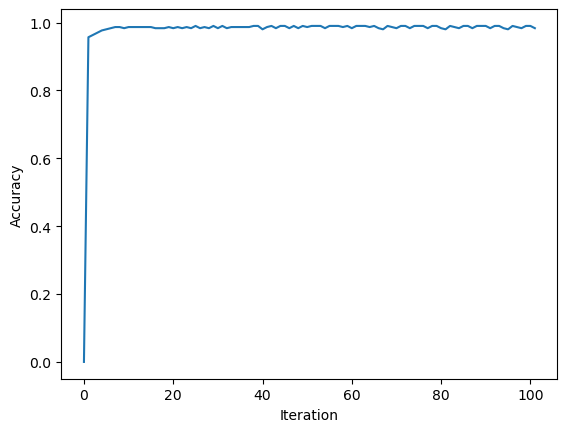

In [95]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

Here's a function that will help us to draw the separating hyperplane, which is a line in 2D!

In [96]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

### Visualize how our implementation performed with a synthetic data set that is not linearly separable.
We have started with a data set that is not linearly separable. Nonetheless, our implementation performed relatively well. We could see that it separates the two "cluster" of data points. Here is a plot of how our Perceptron Algorithm worked in the 2D space of feature 1 and feature 2. It's not bad! It seems that there are a few points that's on the wrong side, but our implementation works quite well overall! 

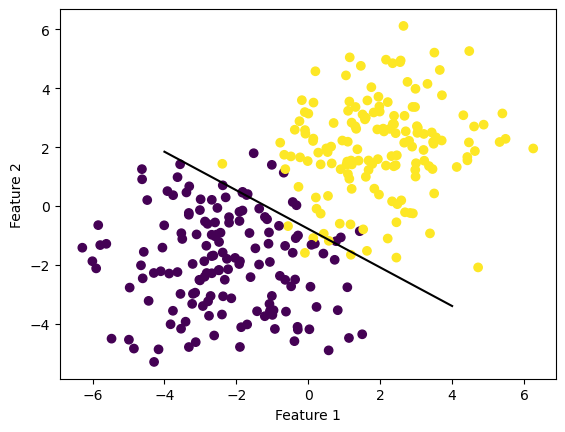

In [97]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w_, -4, 4)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

### Test on a linearly separable set
We also want to try our implementation on a linearly separable data set.

X has dimension: (300, 2)
y has dimension: (300,)


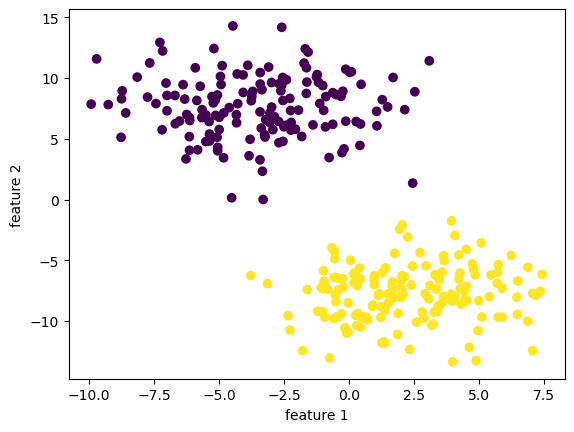

In [83]:
import numpy as np
np.random.seed(2023)
n=300
p_features = 3 
X, y = make_blobs(n_samples = n, n_features=p_features-1, centers=2, cluster_std=2.5) 
fig=plt.scatter(X[:,0], X[:,1], c=y)
xlab=plt.xlabel("feature 1")
ylab=plt.ylabel("feature 2")
print(f"X has dimension: {X.shape}")
print(f"y has dimension: {y.shape}")

In [90]:
from perceptron import Perceptron
perc = Perceptron()
perc.fit(X, y, maxiter=1e2)
print(f"the last 10 scores in our score history is: {perc.history[-10:]}")
print(f"the weights we obtained are: {perc.w_}")
# print(X)
# print(w)

the last 10 scores in our score history is: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
the weights we obtained are: [ 14.135741   -30.87922253 -93.        ]


We see that our implementation reached a $100 \%$ accuracy before hitting $20$ iterations!

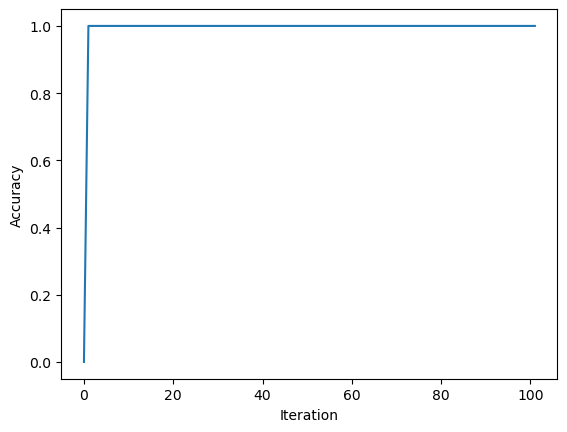

In [91]:
fig = plt.plot(perc.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

Since the data is linearly separable with a nice "margin" in the middle, our implementation mangaged to separate the data points without too much effort!

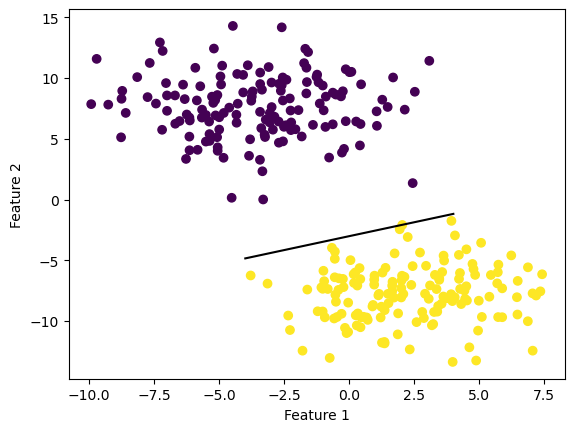

In [92]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(perc.w_, -4, 4)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

### many many features!
What if we have higher dimentional data with $10$ features? Would our implementation work? Let's find out!

X has dimension: (300, 9)
y has dimension: (300,)


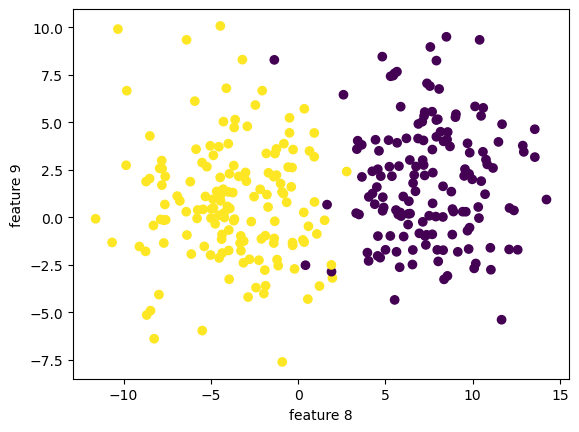

In [114]:
import numpy as np
np.random.seed(42)
n=300
p_features = 10 
X, y = make_blobs(n_samples = n, n_features=p_features-1, centers=2, cluster_std=3) 
fig=plt.scatter(X[:,7], X[:,8], c=y)
xlab=plt.xlabel("feature 8")
ylab=plt.ylabel("feature 9")
print(f"X has dimension: {X.shape}")
print(f"y has dimension: {y.shape}")

We can still visualize the data, but only 2 dimension at a time!

X has dimension: (300, 9)
y has dimension: (300,)


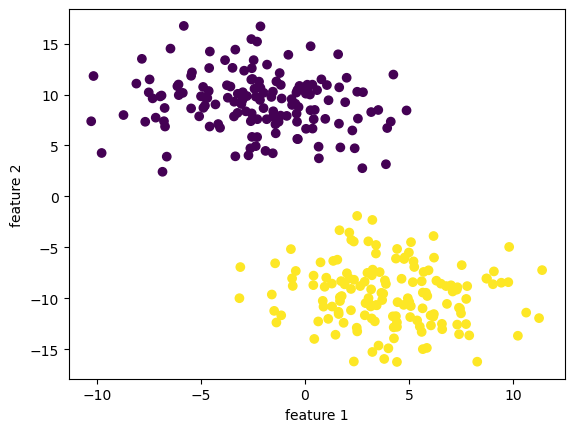

In [115]:
fig=plt.scatter(X[:,0], X[:,1], c=y)
xlab=plt.xlabel("feature 1")
ylab=plt.ylabel("feature 2")
print(f"X has dimension: {X.shape}")
print(f"y has dimension: {y.shape}")

In [116]:
from perceptron import Perceptron
perc2 = Perceptron()
perc2.fit(X, y, maxiter=1e3)
print(f"the last 10 scores in our score history is: {perc2.history[-10:]}")

the last 10 scores in our score history is: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


The last 10 scores looks good! The overall score history looks good!

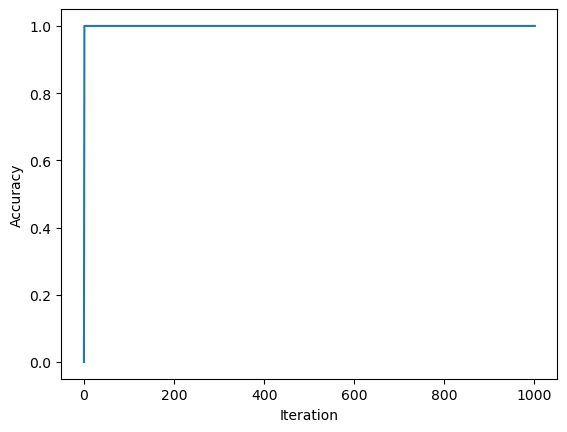

In [117]:
fig = plt.plot(perc2.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

Let us see how our implementation did in the first 2 dimensions! It's not bad at all!

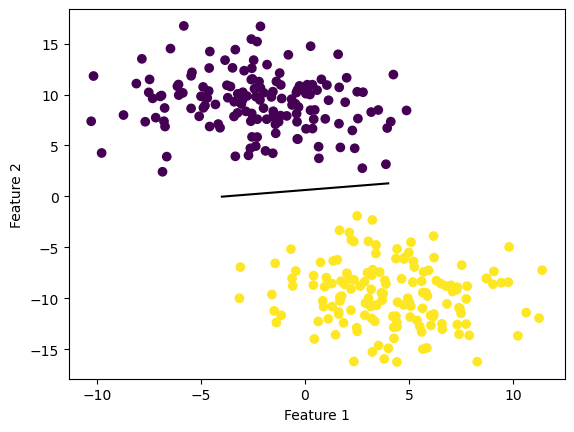

In [118]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(perc2.w_, -4, 4)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

### Note to future self
Here's a little trick for implementing characteristic function in python code. Alternatively, one can use `np.where()`.

In [119]:
print((1<2)*1)
print((1>2)*1)

1
0


We could see under the hood the prediction for each data point, and compare it to the actual label.

In [120]:
print(f"our predicted label: {perc2.predict(X)}")
print("\n")
print(f"the actual label: {y}")

our predicted label: [1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0
 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1
 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0
 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0
 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1
 0 1 0 0]


the actual label: [1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0
 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1
 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 

### Time complexity for update step 

Recall our equation for the update step:
$$ \tilde{w}^{(t+1)} = \tilde{w}^{t} + \mathbb{1} (\tilde{y}_i \langle \tilde{w}^{(t)}, \tilde{x}_i \rangle < 0)\tilde{y}_i\tilde{x}_i.$$
This involves taking an inner product $ \langle \tilde{w}^{(t)}, \tilde{x}_i \rangle, $ which has time complexity $O(p \cdot n)$ where $p$ is a constant denoting the number of features, and $n$ denotes the number of data points we have. The other operations are addition, multiplication, taking the simple (step) function, which have constant time complexity $O(1)$.